# ETAUTE test for pink noise REW measurements

## Imports 

In [ ]:
import numpy as np
import soundfile as sf

from matplotlib import pyplot as plt
from scipy.signal import welch

import scipy.signal as sig
import dsp_tools

plt.style.use('default')


## Import and plot tihi

In [43]:
data_high, samplerate_high = sf.read('./HØJ.wav')
data_middle, samplerate_middle = sf.read('./MELLEM.wav')
data_low, samplerate_low = sf.read('./LAV.wav')
data_ref , samplerate_ref = sf.read('./PINK_NOISE_REFERENCE.wav')

print(samplerate_ref)
print(samplerate_low)

Plots 

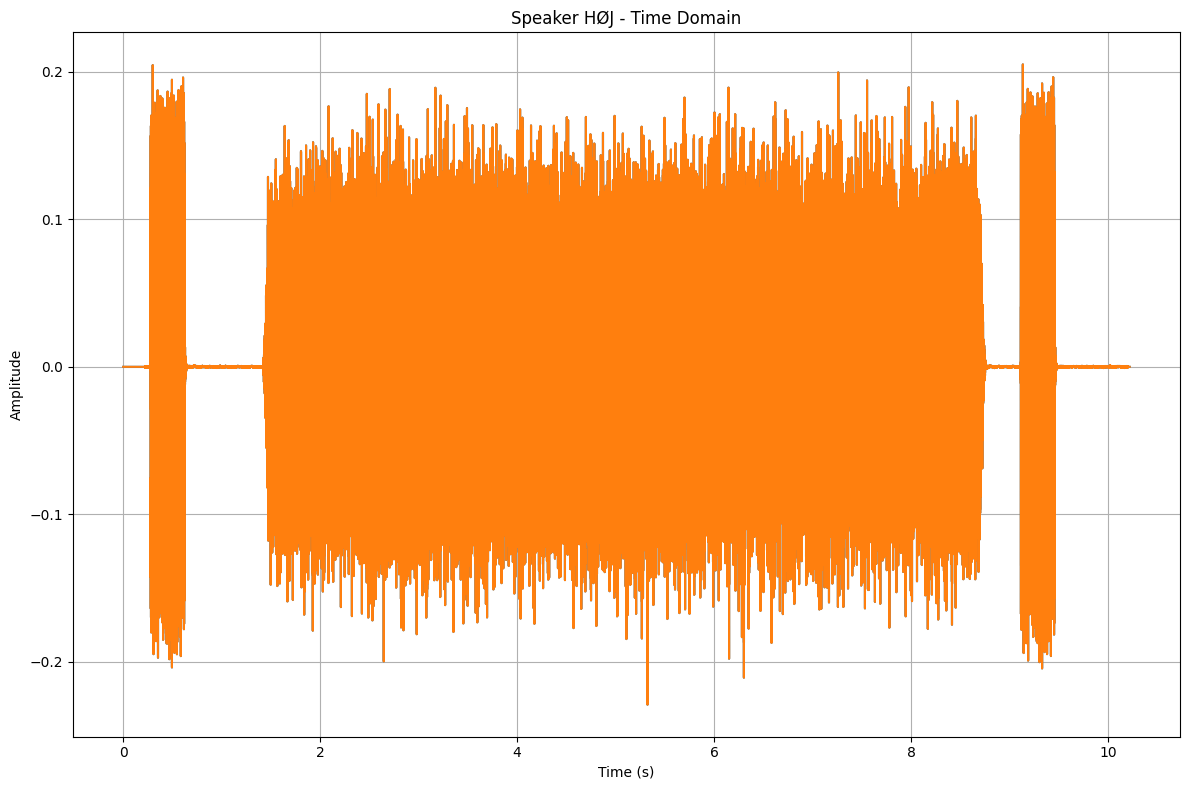

In [44]:
dsp_tools.plot_signal_time(data_high, fs=48000, title="Speaker HØJ - Time Domain");

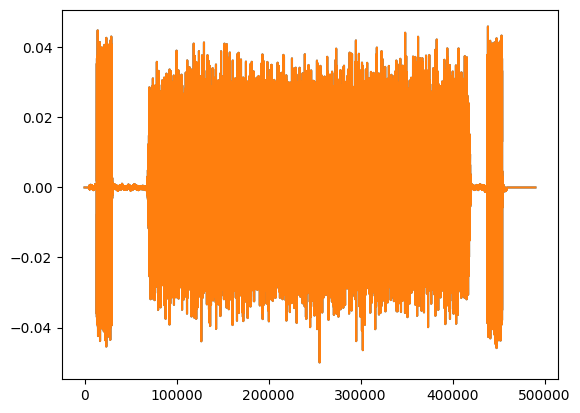

In [45]:
plt.plot(data_middle)
plt.show()

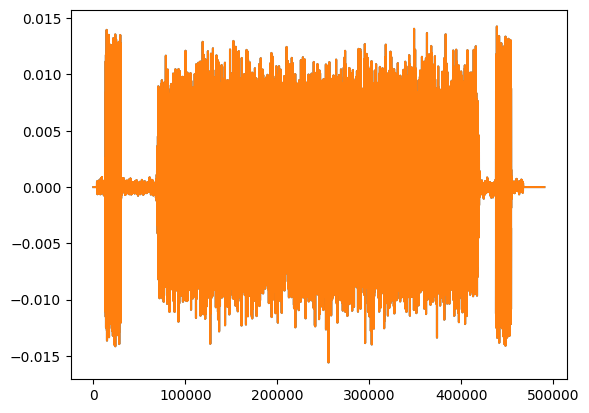

In [46]:
plt.plot(data_low)

In [ ]:
%matplotlib tk

ref = np.asarray(data_ref[:,0])
low = np.asarray(data_low[:,0])
low = low[48000:480000-48000]
# shift = 
plt.plot(low)
print(low.shape)
# plt.plot(data_ref[0:100])
plt.show()

In [ ]:
# Assume data_ref and data_low are 2D arrays

# Compute cross-correlation
corr = sig.correlate(low, ref, mode='full')
lags = np.arange(-len(ref)+1, len(low))
best_lag = lags[np.argmax(corr)]
print(f"Best lag: {best_lag} samples")

# Align low to ref
if best_lag > 0:
    # low lags behind ref → remove first 'best_lag' samples from low
    aligned_low = low[best_lag:]
    aligned_ref = ref[:len(aligned_low)]
elif best_lag < 0:
    # low is ahead of ref → remove last '-best_lag' samples from low
    aligned_low = low[:best_lag]  # negative index trims from the end
    aligned_ref = ref[-best_lag:]
else:
    aligned_low = low
    aligned_ref = ref
print(aligned_ref.shape)

# Plot
plt.plot(aligned_ref, label='ref')
plt.plot(aligned_low, label='low (aligned)')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Aligned Signals')
plt.show()